In [1]:
import pandas as pd

In [2]:
# Optional display settings for better notebook formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 10)       # Limit number of rows shown
pd.set_option('display.width', 1000)        # Width of the display in characters

In [3]:
Train = pd.read_csv('Train-1542865627584.csv')  # 5,410 rows, Provider fraud labels
Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')  # 138,556 rows, Patient info
Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')  # 40,474 rows, Hospital stays
Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')  # 517,737 rows, Outpatient visits

In [4]:
# Calculate the Patient stay at hospital in days
Inpatient['AdmissionDt']= pd.to_datetime(Inpatient['AdmissionDt'])
Inpatient['DischargeDt']= pd.to_datetime(Inpatient['DischargeDt'])
Inpatient['StayAtHospitalInDays'] = (Inpatient['DischargeDt'] - Inpatient['AdmissionDt']).dt.days


In [5]:
# Get provider-level  of stay at hospital average of days
IP_provider_days = Inpatient.groupby('Provider')['StayAtHospitalInDays'].mean().reset_index().round()
IP_provider_days = IP_provider_days.rename(columns={'StayAtHospitalInDays': 'IP_Averagedaysinhospital'})
IP_provider_days

,Provider,IP_Averagedaysinhospital
0,PRV51001,5.0
1,PRV51003,5.0
2,PRV51007,5.0
3,PRV51008,4.0
4,PRV51011,5.0
...,...,...
2087,PRV57719,14.0
2088,PRV57728,4.0
2089,PRV57729,6.0
2090,PRV57732,5.0


In [6]:
# Merge IP_provider_days  and Train
provider_daysinhospital = pd.merge(
    Train,
    IP_provider_days,  
    on='Provider',
    how='left'
).fillna(0)  

In [7]:
provider_daysinhospital

,Provider,PotentialFraud,IP_Averagedaysinhospital
0,PRV51001,No,5.0
1,PRV51003,Yes,5.0
2,PRV51004,No,0.0
3,PRV51005,Yes,0.0
4,PRV51007,No,5.0
...,...,...,...
5405,PRV57759,No,0.0
5406,PRV57760,No,0.0
5407,PRV57761,No,0.0
5408,PRV57762,No,0.0


In [8]:
# Save final_df as a CSV file
provider_daysinhospital.to_csv("Merge_providerlevel_Stayathospital.csv", index=False)

<Figure size 1000x500 with 0 Axes>

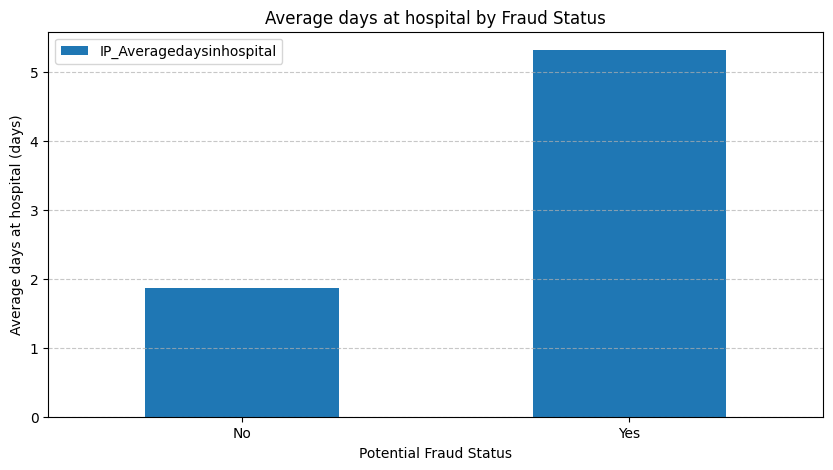

In [9]:
import matplotlib.pyplot as plt


# Grouping by PotentialFraud and calculating mean reimbursement amounts
fraud_summary = provider_daysinhospital.groupby("PotentialFraud")[
    ["IP_Averagedaysinhospital"]
].mean()

# Plotting Inpatient stay at hospital
plt.figure(figsize=(10, 5))
fraud_summary.plot(kind="bar", figsize=(10, 5), rot=0)
plt.title("Average days at hospital by Fraud Status")
plt.ylabel("Average days at hospital (days)")
plt.xlabel("Potential Fraud Status")
plt.xticks(rotation=0)
plt.legend(["IP_Averagedaysinhospital"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
